# Topic Modelling 

I've collected a selection of songs and associated metadata. These are going to be my first attempts at Topic Modelling. The following code removes songs tagged as anything else but Pop, Rock or Pop Rock; separates the sonsg into three generation, does some extra pre-processing and applies topic modelling, treating each song as a separate entity. 

In [ ]:
pip install pyLDAvis

In [ ]:
# --- SETUP ---
nltk.download("punkt")
nltk.download("stopwords")


 Data Cleaning Complete! Cleaned dataset saved as 'Filtered_Categorized_Love_Song_Data.csv'.

--- Topic Modeling for Gen X Love Songs ---
(0, '0.021*"love" + 0.017*"yeah" + 0.014*"get" + 0.012*"like" + 0.010*"got"')
(1, '0.011*"said" + 0.011*"back" + 0.007*"lay" + 0.007*"chain" + 0.007*"get"')
(2, '0.022*"love" + 0.014*"im" + 0.014*"know" + 0.013*"oh" + 0.011*"na"')
(3, '0.044*"love" + 0.018*"dont" + 0.016*"baby" + 0.015*"know" + 0.015*"im"')
(4, '0.021*"la" + 0.020*"oh" + 0.018*"got" + 0.016*"na" + 0.015*"gon"')


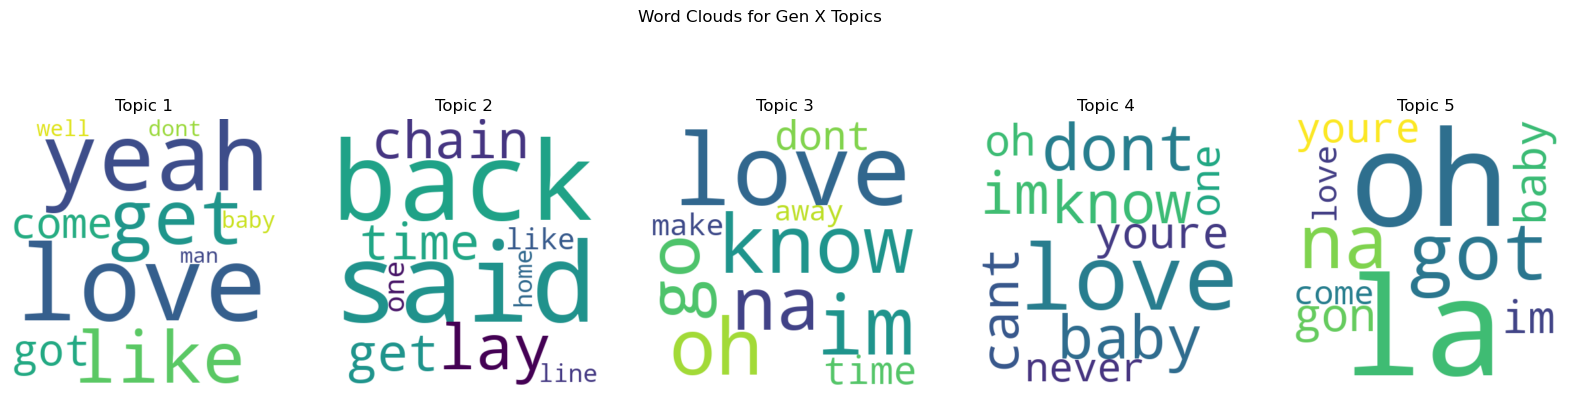

Interactive visualization saved: Gen X_LDA_Visualization.html

--- Topic Modeling for Millennial Love Songs ---
(0, '0.033*"love" + 0.032*"baby" + 0.022*"dont" + 0.021*"know" + 0.021*"oh"')
(1, '0.025*"dont" + 0.016*"youre" + 0.011*"miss" + 0.011*"dance" + 0.008*"like"')
(2, '0.016*"get" + 0.014*"like" + 0.014*"got" + 0.013*"lets" + 0.012*"yeah"')
(3, '0.067*"na" + 0.021*"wan" + 0.020*"gon" + 0.016*"im" + 0.012*"make"')
(4, '0.021*"love" + 0.015*"im" + 0.015*"know" + 0.012*"never" + 0.011*"dont"')


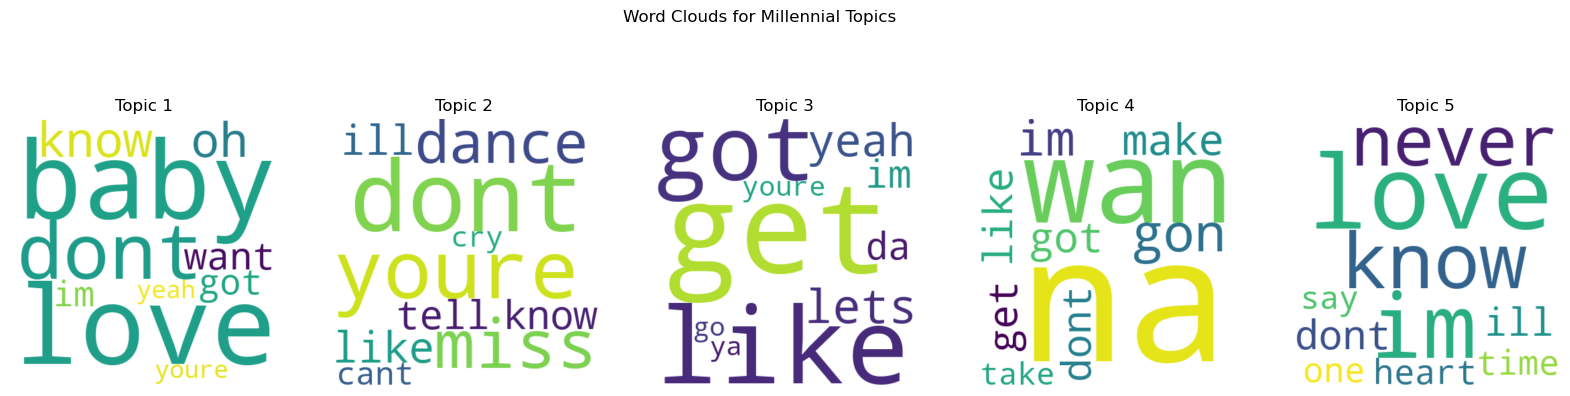

Interactive visualization saved: Millennial_LDA_Visualization.html

--- Topic Modeling for Gen Z Love Songs ---
(0, '0.010*"like" + 0.009*"im" + 0.008*"back" + 0.008*"well" + 0.006*"youre"')
(1, '0.035*"love" + 0.028*"im" + 0.023*"dont" + 0.021*"know" + 0.014*"youre"')
(2, '0.026*"im" + 0.023*"yeah" + 0.020*"like" + 0.020*"got" + 0.014*"get"')
(3, '0.040*"oh" + 0.025*"na" + 0.025*"baby" + 0.019*"got" + 0.018*"like"')
(4, '0.069*"la" + 0.013*"walk" + 0.011*"bout" + 0.010*"let" + 0.009*"wont"')


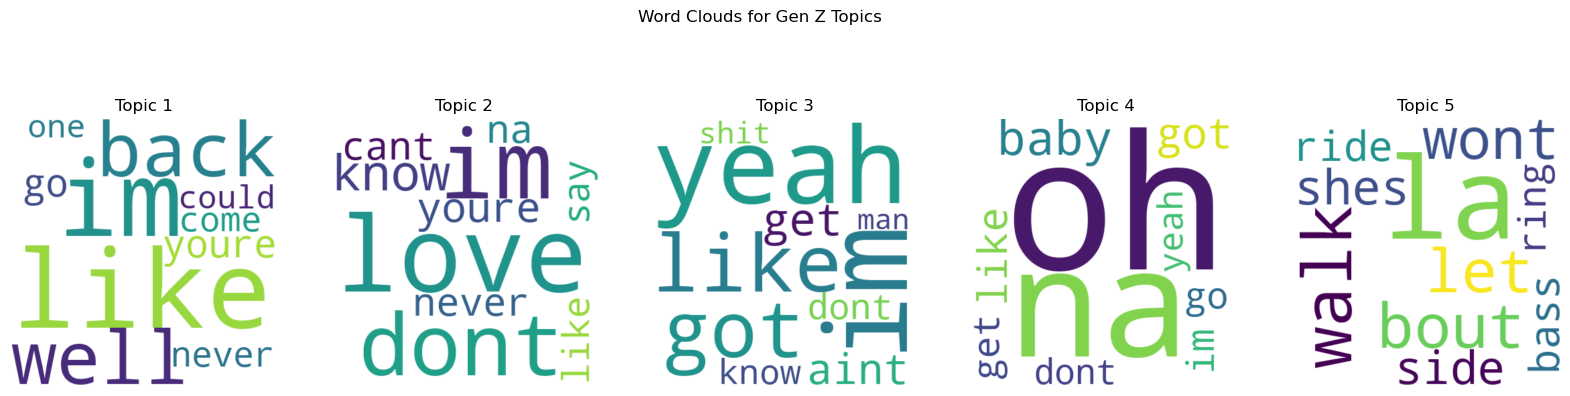

Interactive visualization saved: Gen Z_LDA_Visualization.html

Topic Modeling and Visualizations Complete!


In [172]:
import pandas as pd
import string
import nltk
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# --- LOAD RAW DATA ---
file_path = "/Users/madeline/Desktop/test_wikipedia_metadata_updated.csv"  # Change to your actual file name
df = pd.read_csv(file_path)

# --- CLEAN LYRICS ---
def clean_lyrics(text):
    if pd.isna(text): return ""  # Handle missing lyrics
    text = text.lower().translate(str.maketrans("", "", string.punctuation))  # Lowercase & remove punctuation
    words = [word for word in word_tokenize(text) if word not in stopwords.words("english")]  # Tokenize & remove stopwords
    return words

df["Processed Lyrics"] = df["Cleaned_Lyrics"].apply(clean_lyrics)  # Apply cleaning function

# --- CATEGORIZE INTO GENERATIONS ---
def assign_generation(year):
    """Assign a song to a generation based on release year."""
    if pd.isna(year) or not str(year).isdigit():  # Check if the year is NaN or non-numeric
        return "Unknown"
    year = int(year)
    return "Gen X" if 1965 <= year <= 1980 else "Millennial" if 1981 <= year <= 2000 else "Gen Z" if 2001 <= year <= 2020 else "Unknown"

# Ensure this line executes without error
df["Generation"] = df["Release Year"].apply(assign_generation)

# --- SAVE CLEANED DATA ---
df.to_csv("/Users/madeline/Desktop/Filtered_Categorized_Love_Song_Data.csv", index=False)
print("\n Data Cleaning Complete! Cleaned dataset saved as 'Filtered_Categorized_Love_Song_Data.csv'.")

# --- TOPIC MODELING & VISUALIZATIONS ---
for gen in ["Gen X", "Millennial", "Gen Z"]:
    print(f"\n--- Topic Modeling for {gen} Love Songs ---")

    # Filter songs for this generation
    gen_songs = df[df["Generation"] == gen]["Processed Lyrics"].tolist()
    if len(gen_songs) < 5:
        print(f"Not enough songs for {gen} topic modeling. Skipping...")
        continue

    # Create dictionary and corpus
    dictionary = corpora.Dictionary(gen_songs)
    corpus = [dictionary.doc2bow(song) for song in gen_songs]

    # Apply LDA
    lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

    # Print topics
    for topic in lda_model.print_topics(num_words=5):
        print(topic)

    # --- WORD CLOUD VISUALIZATION ---
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))
    for i, topic in enumerate(lda_model.show_topics(num_topics=5, formatted=False)):
        words = dict(topic[1])  # Extract words and weights
        wordcloud = WordCloud(width=400, height=400, background_color="white").generate_from_frequencies(words)
        axes[i].imshow(wordcloud, interpolation="bilinear")
        axes[i].set_title(f"Topic {i+1}")
        axes[i].axis("off")

    plt.suptitle(f"Word Clouds for {gen} Topics")
    plt.show()

    # --- INTERACTIVE LDA VISUALIZATION ---
    vis = gensimvis.prepare(lda_model, corpus, dictionary)
    pyLDAvis.save_html(vis, f"{gen}_LDA_Visualization.html")
    print(f"Interactive visualization saved: {gen}_LDA_Visualization.html")

print("\nTopic Modeling and Visualizations Complete!")


# Second attempt with adjustments to improve topics

(0, '0.011*"oohooh" + 0.006*"shack" + 0.004*"substitut" + 0.004*"es" + 0.004*"springtim"')
(1, '0.007*"gal" + 0.007*"woh" + 0.004*"afterglow" + 0.004*"stutter" + 0.004*"uptight"')
(2, '0.008*"21" + 0.006*"mighti" + 0.006*"septemb" + 0.006*"rubi" + 0.005*"neither"')
(3, '0.005*"oh" + 0.005*"babi" + 0.005*"na" + 0.005*"want" + 0.004*"yeah"')
(4, '0.013*"di" + 0.007*"dem" + 0.006*"wo" + 0.005*"reveng" + 0.004*"uptown"')
(5, '0.010*"who" + 0.007*"sunshin" + 0.006*"letter" + 0.006*"someday" + 0.006*"kept"')
(6, '0.006*"maria" + 0.006*"holli" + 0.005*"vu" + 0.005*"jingl" + 0.004*"ave"')
(7, '0.008*"monkey" + 0.007*"bass" + 0.006*"brick" + 0.006*"super" + 0.006*"cradl"')
(8, '0.013*"da" + 0.008*"ha" + 0.007*"sexi" + 0.006*"ooo" + 0.005*"stuff"')
(9, '0.008*"loneli" + 0.007*"tide" + 0.006*"fever" + 0.006*"ought" + 0.006*"shelter"')


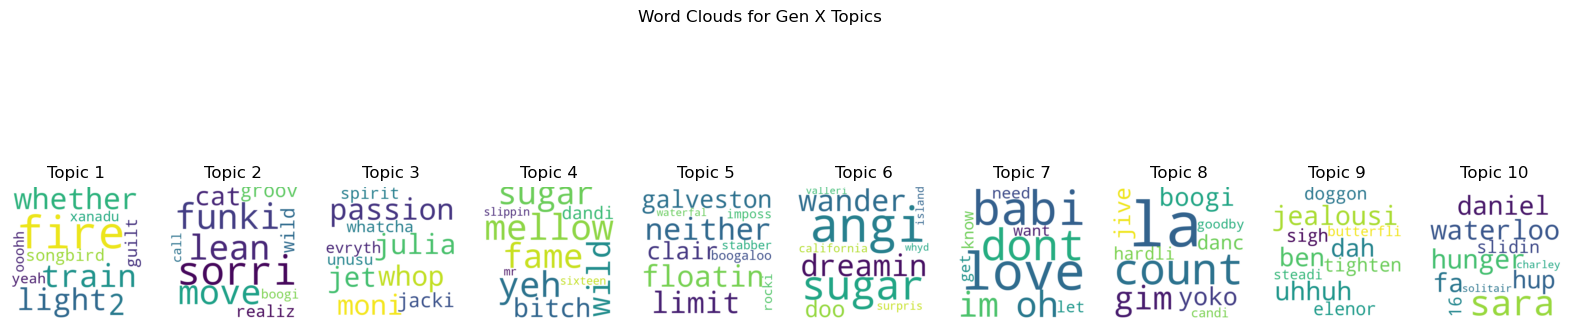

 Interactive visualization saved: Gen X_LDA_Visualization.html


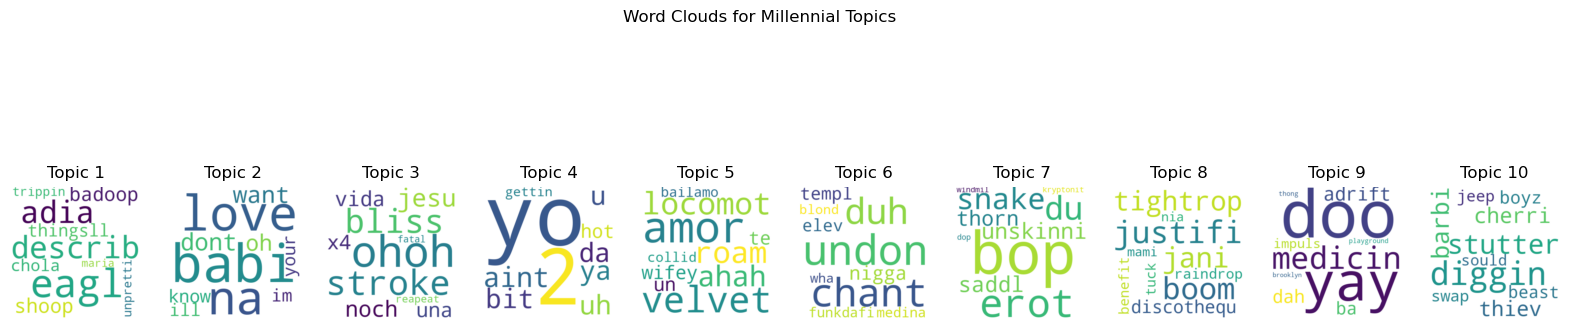

 Interactive visualization saved: Millennial_LDA_Visualization.html


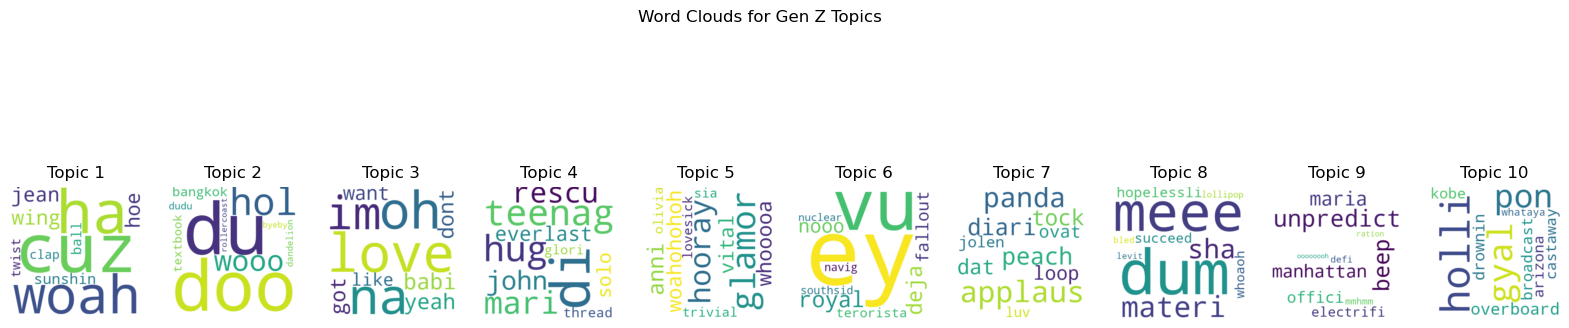

 Interactive visualization saved: Gen Z_LDA_Visualization.html

 Topic Modeling and Visualizations Complete!


In [174]:
from nltk.stem import PorterStemmer
from gensim.models import TfidfModel
import pandas as pd
import string
import nltk
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# --- LOAD RAW DATA ---
file_path = "/Users/madeline/Desktop/Filtered_Categorized_Love_Song_Data.csv"  # Change to your actual file name
df = pd.read_csv(file_path)

# Enhanced preprocessing function with stemming and TFIDF
def clean_lyrics(text):
    if pd.isna(text): return ""  # Handle missing lyrics
    text = text.lower().translate(str.maketrans("", "", string.punctuation))  # Lowercase & remove punctuation
    words = [word for word in word_tokenize(text) if word not in stopwords.words("english")]  # Tokenize & remove stopwords
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]  # Apply stemming
    return words

# Preprocess the lyrics
df["Processed Lyrics"] = df["Cleaned_Lyrics"].apply(clean_lyrics)

# Create dictionary and corpus
dictionary = corpora.Dictionary(df["Processed Lyrics"])
dictionary.filter_extremes(no_below=5, no_above=0.5)  # Filter words

# Apply TFIDF
corpus = [dictionary.doc2bow(song) for song in df["Processed Lyrics"]]
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Apply LDA with more topics and passes
lda_model = gensim.models.LdaModel(corpus_tfidf, num_topics=10, id2word=dictionary, passes=15, alpha='auto', eta='auto')

# Print topics
for topic in lda_model.print_topics(num_words=5):
    print(topic)

# Visualizations (word cloud and interactive)
for gen in ["Gen X", "Millennial", "Gen Z"]:
    gen_songs = df[df["Generation"] == gen]["Processed Lyrics"].tolist()
    dictionary = corpora.Dictionary(gen_songs)
    corpus = [dictionary.doc2bow(song) for song in gen_songs]
    tfidf = TfidfModel(corpus)
    corpus_tfidf = tfidf[corpus]
    
    lda_model = gensim.models.LdaModel(corpus_tfidf, num_topics=10, id2word=dictionary, passes=15, alpha='auto', eta='auto')
    
    # Word Clouds
    fig, axes = plt.subplots(1, 10, figsize=(20, 5))
    for i, topic in enumerate(lda_model.show_topics(num_topics=10, formatted=False)):
        words = dict(topic[1])
        wordcloud = WordCloud(width=400, height=400, background_color="white").generate_from_frequencies(words)
        axes[i].imshow(wordcloud, interpolation="bilinear")
        axes[i].set_title(f"Topic {i+1}")
        axes[i].axis("off")

    plt.suptitle(f"Word Clouds for {gen} Topics")
    plt.show()

    # Save interactive LDA visualization
    vis = gensimvis.prepare(lda_model, corpus_tfidf, dictionary)
    pyLDAvis.save_html(vis, f"{gen}_LDA_Visualization.html")
    print(f" Interactive visualization saved: {gen}_LDA_Visualization.html")

print("\n Topic Modeling and Visualizations Complete!")


# One topic per generation 

In [ ]:
pip install pandas numpy gensim pyLDAvis plotly wordcloud scikit-learn nltk

[nltk_data] Downloading package punkt to /Users/madeline/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/madeline/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 Processing: Millennial
 Interactive visualization saved: Millennial_LDA_Visualization.html


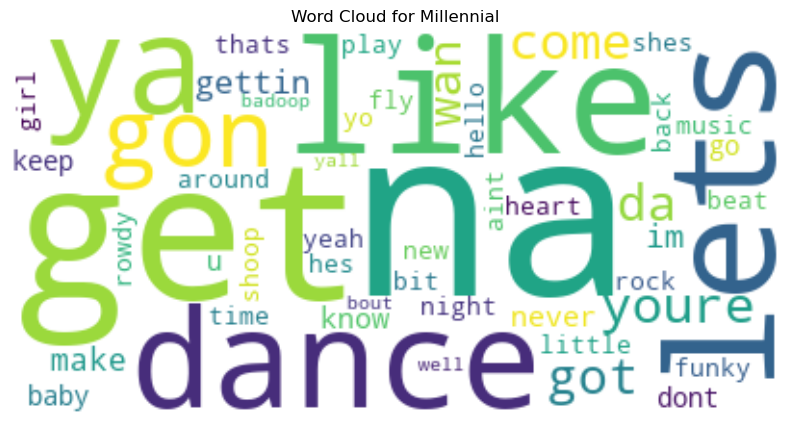

 t-SNE clustering visualization saved: Millennial_tSNE_Clusters.html
 Processing: Gen Z
 Interactive visualization saved: Gen Z_LDA_Visualization.html


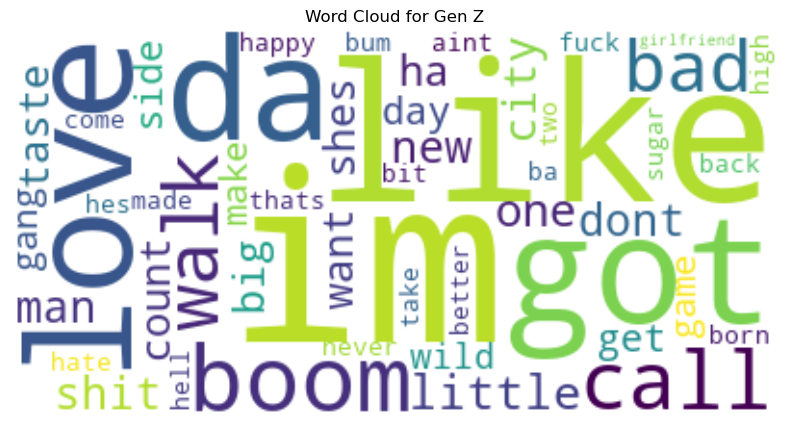

 t-SNE clustering visualization saved: Gen Z_tSNE_Clusters.html
 Processing: Unknown
 Interactive visualization saved: Unknown_LDA_Visualization.html


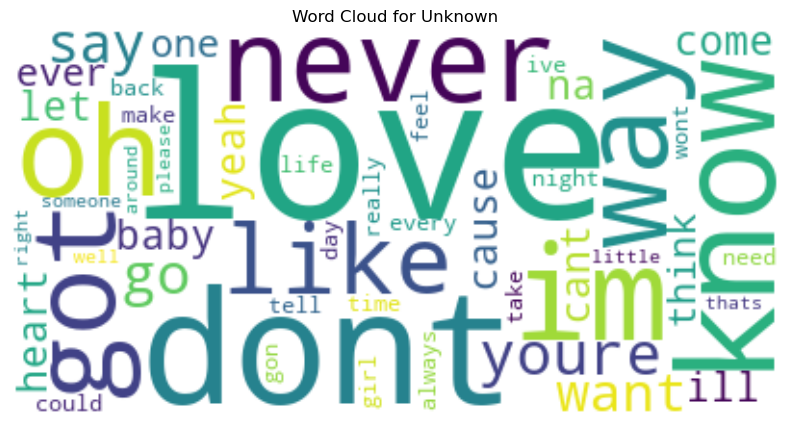

 t-SNE clustering visualization saved: Unknown_tSNE_Clusters.html
 Processing: Gen X
 Interactive visualization saved: Gen X_LDA_Visualization.html


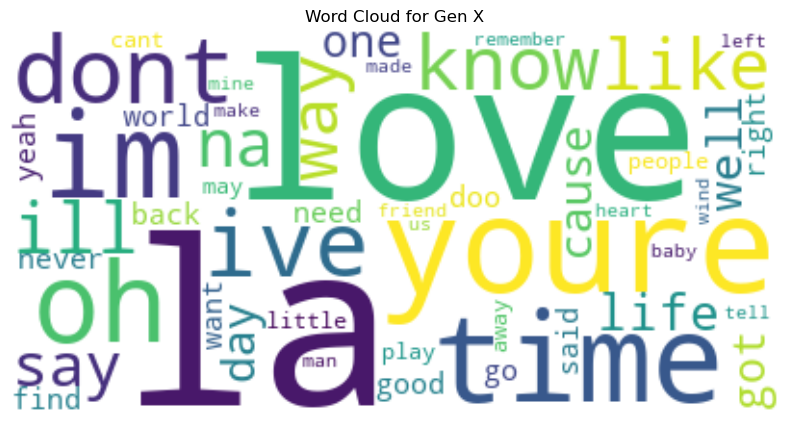

 t-SNE clustering visualization saved: Gen X_tSNE_Clusters.html

 Topics for Millennial:
(0, '0.032*"na" + 0.020*"get" + 0.012*"like" + 0.011*"lets" + 0.009*"dance" + 0.009*"ya" + 0.009*"gon" + 0.008*"youre" + 0.008*"come" + 0.007*"got"')
(1, '0.044*"love" + 0.015*"im" + 0.013*"ill" + 0.012*"never" + 0.011*"time" + 0.011*"one" + 0.010*"heart" + 0.010*"oh" + 0.009*"know" + 0.008*"give"')
(2, '0.031*"baby" + 0.028*"got" + 0.023*"im" + 0.022*"yeah" + 0.017*"oh" + 0.014*"like" + 0.014*"na" + 0.011*"love" + 0.009*"know" + 0.009*"girl"')
(3, '0.037*"dont" + 0.032*"know" + 0.019*"want" + 0.019*"na" + 0.017*"baby" + 0.016*"love" + 0.015*"im" + 0.014*"youre" + 0.013*"tell" + 0.012*"go"')
(4, '0.009*"ba" + 0.009*"dont" + 0.008*"like" + 0.008*"oh" + 0.007*"one" + 0.007*"got" + 0.007*"bop" + 0.006*"think" + 0.006*"know" + 0.006*"get"')

 Topics for Gen Z:
(0, '0.016*"im" + 0.016*"like" + 0.009*"got" + 0.008*"love" + 0.008*"da" + 0.008*"boom" + 0.007*"call" + 0.006*"walk" + 0.005*"bad" + 0.005*"lit

In [179]:
import pandas as pd
import numpy as np
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk

# Download NLTK data if needed
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset
df = pd.read_csv("/Users/madeline/Desktop/Filtered_Categorized_Love_Song_Data.csv")  # Change this to your dataset filename

# Check if 'Generation' column exists
if "Generation" not in df.columns or "Cleaned_Lyrics" not in df.columns:
    raise KeyError("Dataset must contain 'Generation' and 'Lyrics' columns!")

# Text cleaning function
def clean_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize words
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]  # Remove stopwords & non-alphabetic
    return tokens

# Apply cleaning to lyrics
df["Processed Lyrics"] = df["Cleaned_Lyrics"].astype(str).apply(clean_text)

# Store results
results = {}

# Loop through each generation
for gen in df["Generation"].unique():
    print(f" Processing: {gen}")

    # Filter dataset for the generation
    gen_songs = df[df["Generation"] == gen]["Processed Lyrics"].tolist()

    # Create dictionary & corpus
    dictionary = corpora.Dictionary(gen_songs)
    corpus = [dictionary.doc2bow(song) for song in gen_songs]

    # Train LDA model
    num_topics = 5  # Adjust number of topics as needed
    lda_model = gensim.models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)

    # Save topics
    topics = lda_model.print_topics(num_words=10)
    results[gen] = topics

    #  PyLDAvis Interactive Visualization
    vis = gensimvis.prepare(lda_model, corpus, dictionary)
    pyLDAvis.save_html(vis, f"{gen}_LDA_Visualization.html")

    print(f" Interactive visualization saved: {gen}_LDA_Visualization.html")

    #  Generate Word Clouds
    plt.figure(figsize=(10, 5))
    wc = WordCloud(background_color="white", max_words=50).generate_from_frequencies(dict(lda_model.show_topic(0, 50)))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {gen}")
    plt.savefig(f"{gen}_WordCloud.png")
    plt.show()

    #  Interactive t-SNE Topic Clustering
    topic_weights = []
    for i in range(len(corpus)):
        topic_weights.append([w for w, _ in lda_model.get_document_topics(corpus[i])])

    #  **Fix: Ensure topic weights are padded before applying t-SNE**
    max_topics = num_topics  # Ensure fixed size
    topic_weights_padded = np.array([np.pad(w, (0, max_topics - len(w)), 'constant') for w in topic_weights])

    tsne_model = TSNE(n_components=2, random_state=42)
    tsne_values = tsne_model.fit_transform(topic_weights_padded)

    df_tsne = pd.DataFrame(tsne_values, columns=["x", "y"])
    df_tsne["Generation"] = gen

    fig = px.scatter(df_tsne, x="x", y="y", color="Generation", title=f"t-SNE Clustering for {gen} Topics")
    fig.write_html(f"{gen}_tSNE_Clusters.html")

    print(f" t-SNE clustering visualization saved: {gen}_tSNE_Clusters.html")

# Print topics per generation
for gen, topics in results.items():
    print(f"\n Topics for {gen}:")
    for topic in topics:
        print(topic)


# Counting up the songs analysed for each genre and time period. 

In [181]:
import pandas as pd

# Load dataset
file_path = "/Users/madeline/Desktop/Filtered_Categorized_Love_Song_Data.csv"  # Update if needed
df = pd.read_csv(file_path)

# Ensure required columns exist
required_columns = ["Generation", "Standardized Genre"]
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    raise KeyError(f"Dataset is missing required columns: {missing_columns}")

# Standardize genre names
df["Genre"] = df["Standardized Genre"].str.lower().str.strip()

# Define target genres
target_genres = ["pop", "rock", "pop rock"]

# Filter for relevant genres
df_filtered = df[df["Genre"].isin(target_genres)]

# Count songs per generation and genre
song_counts = df_filtered.groupby(["Generation", "Genre"]).size().reset_index(name="Song Count")

# Print summary
print("Song Counts by Generation & Genre:")
print(song_counts)


Song Counts by Generation & Genre:
   Generation Genre  Song Count
0       Gen X   pop         225
1       Gen X  rock         616
2       Gen Z   pop        1703
3       Gen Z  rock        2454
4  Millennial   pop         942
5  Millennial  rock         933
6     Unknown   pop         247
7     Unknown  rock         363


# Cleaning up and completing the date data

In [163]:
import pandas as pd
import requests
import base64
import time  # Import time module to add delay

# Read the CSV file
csv_path = '/Users/madeline/Desktop/test_wikipedia_metadata_complete.csv'
df = pd.read_csv(csv_path)

# Ensure 'Release Year' is a string to check values
df["Release Year"] = df["Release Year"].astype(str).str.strip()

# Standardize "unknown" values (make them NaN for easier handling)
df["Release Year"] = df["Release Year"].replace(["unknown", "Unknown", "", "nan"], pd.NA)

# Convert existing release years to integers (if valid)
df["Release Year"] = pd.to_numeric(df["Release Year"], errors="coerce")

# Define your Spotify API credentials
client_id = 'b968492e90284ee7994ea2dbec033f6c'
client_secret = 'ee057874001244499d4abf9deef06ff2'  # Set this up in Spotify Developer Dashboard

# Function to get Spotify API token
def get_spotify_token(client_id, client_secret):
    url = "https://accounts.spotify.com/api/token"
    
    client_credentials = f"{client_id}:{client_secret}"
    encoded_credentials = base64.b64encode(client_credentials.encode('ascii')).decode('ascii')
    
    headers = {"Authorization": f"Basic {encoded_credentials}"}
    data = {"grant_type": "client_credentials"}

    response = requests.post(url, headers=headers, data=data)

    if response.status_code != 200:
        print(f"Error: Unable to fetch Spotify access token. Status code {response.status_code}")
        return None

    return response.json().get('access_token')

# Function to get release year from Spotify
def get_release_year(song_title, artist, token):
    query = f"{song_title} {artist}"
    url = f"https://api.spotify.com/v1/search?q={query}&type=track&limit=1"
    headers = {"Authorization": f"Bearer {token}"}
    
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print(f"Error: Spotify API request failed for '{song_title}' by {artist}. Status code: {response.status_code}")
        return None

    data = response.json()
    if 'tracks' not in data or not data['tracks']['items']:
        print(f" No track found for '{song_title}' by {artist}.")
        return None

    release_date = data['tracks']['items'][0]['album']['release_date']
    return release_date.split('-')[0]  # Extract and return the year

# Get Spotify token
token = get_spotify_token(client_id, client_secret)

if token:
    print("Spotify API token obtained successfully.")

    updated_rows = 0

    for index, row in df.iterrows():
        release_year = row['Release Year']

        # Only process rows where 'Release Year' is missing
        if pd.isna(release_year):
            song_title = row['song_title']
            artist = row['artist']

            print(f"Searching for '{song_title}' by {artist}...")
            release_year = get_release_year(song_title, artist, token)

            if release_year:
                df.at[index, 'Release Year'] = release_year
                updated_rows += 1
                print(f" Updated '{song_title}' by {artist} to release year {release_year}")
            else:
                print(f" Could not find release year for '{song_title}' by {artist}")

            # Delay to avoid rate limiting
            time.sleep(2)

    print(f"\n🎵 Total 'unknown' or empty release years updated: {updated_rows}")

    # Convert "Release Year" to integer format (if possible)
    df["Release Year"] = pd.to_numeric(df["Release Year"], errors="coerce").astype("Int64")

    # Save the updated CSV
    new_csv_path = '/Users/madeline/Desktop/test_wikipedia_metadata_updated.csv'
    df.to_csv(new_csv_path, index=False)

    print(f" CSV updated successfully and saved as: {new_csv_path}")
else:
    print(" Failed to retrieve Spotify access token.")

# Count remaining unknown values
unknown_count = df["Release Year"].isna().sum()
print(f"🔍 Number of remaining 'unknown' or missing values in 'Release Year': {unknown_count}")


Spotify API token obtained successfully.
Searching for 'See You Again (feat. Charlie Puth)' by Wiz Khalifa...
 Updated 'See You Again (feat. Charlie Puth)' by Wiz Khalifa to release year 2015
Searching for 'Strangers in the Night' by Frank Sinatra...
 Updated 'Strangers in the Night' by Frank Sinatra to release year 1966
Searching for 'Here with Me' by Dido...
 Updated 'Here with Me' by Dido to release year 1999
Searching for 'Hanging by a Moment' by Lifehouse...
 Updated 'Hanging by a Moment' by Lifehouse to release year 2000
Searching for 'Everything Will Be Alright' by The Killers...
 Updated 'Everything Will Be Alright' by The Killers to release year 2004
Searching for 'A Sunday Kind of Love' by Etta James...
 Updated 'A Sunday Kind of Love' by Etta James to release year 1960
Searching for 'Tiny Vessels' by Death Cab for Cutie...
 Updated 'Tiny Vessels' by Death Cab for Cutie to release year 2003
Searching for 'Passenger Seat' by Death Cab for Cutie...
 Updated 'Passenger Seat' by 

In [189]:
import pandas as pd

# Load the cleaned CSV file
file_path = "/Users/madeline/Desktop/Filtered_Categorized_Love_Song_Data.csv"  # Update if needed
df = pd.read_csv(file_path)

# Ensure 'Release Year' is treated properly
df["Release Year"] = pd.to_numeric(df["Release Year"], errors="coerce")

# Count missing (NaN) values in 'Release Year'
unknown_count = df["Release Year"].isna().sum()

# Print the result
print(f" Number of 'Unknown' or missing values in 'Release Year': {unknown_count}")

 Number of 'Unknown' or missing values in 'Release Year': 0


# NETWORK ANALYSIS 

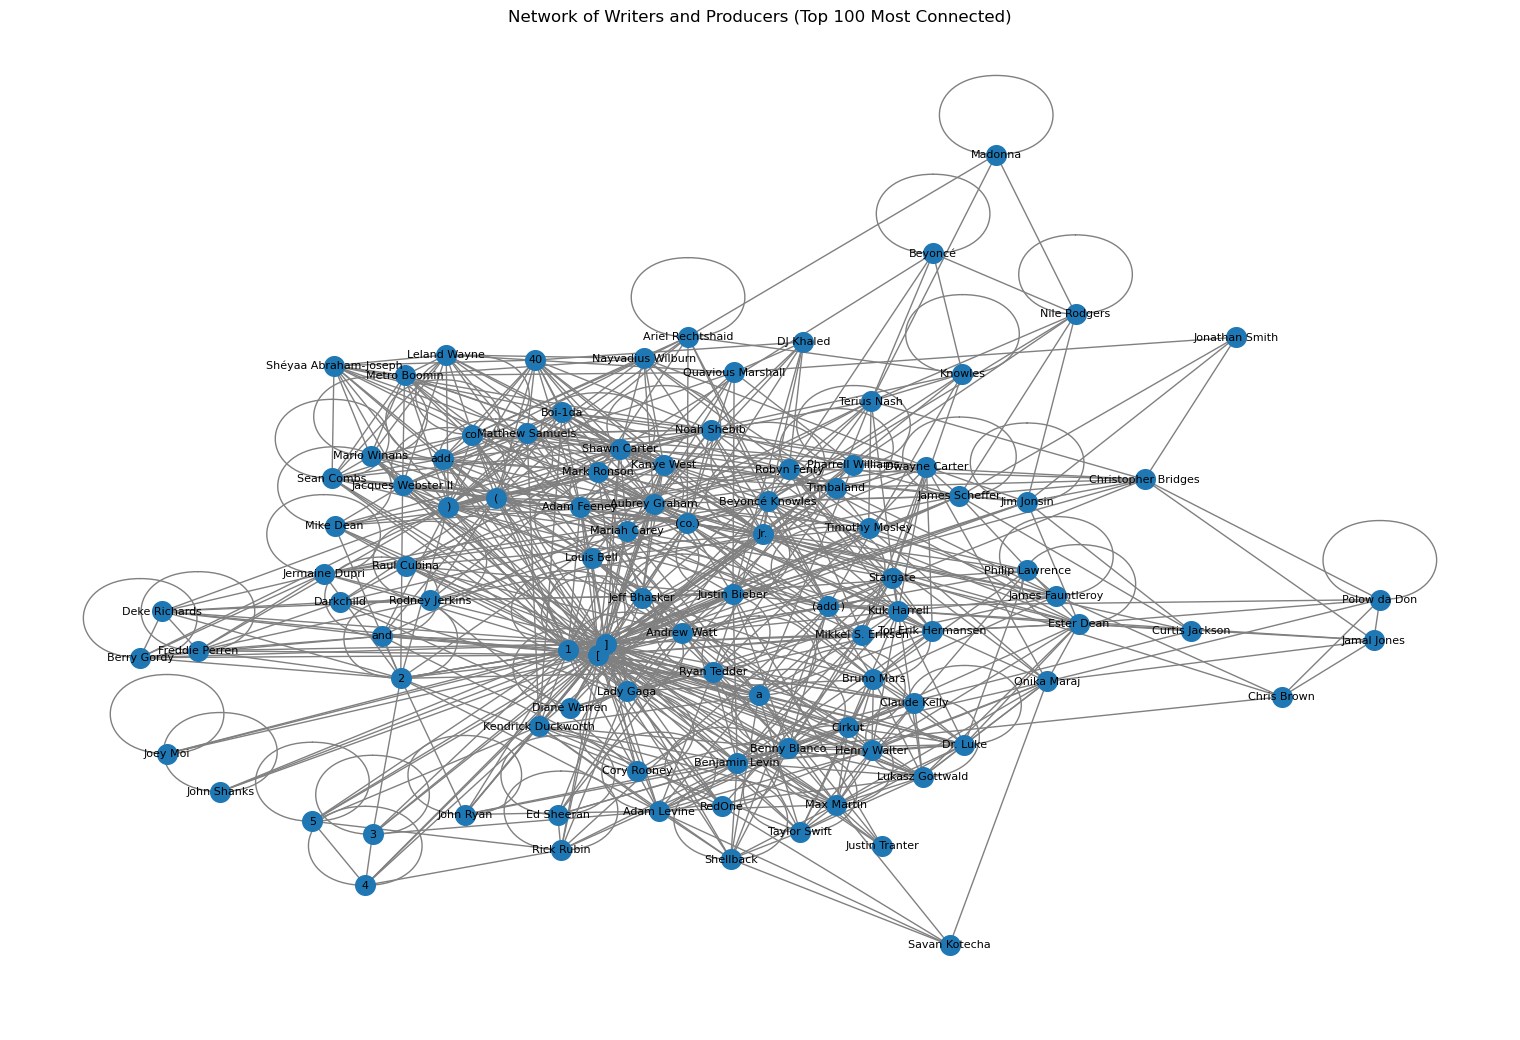

In [103]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/Users/madeline/Desktop/test_wikipedia_metadata_complete.csv"
df = pd.read_csv(file_path)

# Remove 'Unknown' entries
df = df[~df["Writers"].str.contains("Unknown", na=False)]
df = df[~df["Producers"].str.contains("Unknown", na=False)]

# Function to process names and create edges
def create_edges(df, writer_col, producer_col):
    edges = []
    for _, row in df.iterrows():
        writers = [w.strip() for w in str(row[writer_col]).split(',') if w.strip()]
        producers = [p.strip() for p in str(row[producer_col]).split(',') if p.strip()]
        
        # Connect writers with each other (co-writing relationships)
        for i in range(len(writers)):
            for j in range(i + 1, len(writers)):
                edges.append((writers[i], writers[j]))
        
        # Connect producers with each other (co-producing relationships)
        for i in range(len(producers)):
            for j in range(i + 1, len(producers)):
                edges.append((producers[i], producers[j]))
        
        # Connect writers to producers (collaboration relationships)
        for writer in writers:
            for producer in producers:
                edges.append((writer, producer))
    
    return edges

# Create edges based on writers and producers
edges = create_edges(df, "Writers", "Producers")

# Create the network graph
G = nx.Graph()
G.add_edges_from(edges)

# Draw a subgraph of the most connected nodes for clarity
top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:100]  # Top 100 most connected
subgraph = G.subgraph([node for node, _ in top_nodes])

# Visualizing the network
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(subgraph, seed=42)  # Layout for better spacing
nx.draw(subgraph, pos, with_labels=True, node_size=200, font_size=8, edge_color="gray")
plt.title("Network of Writers and Producers (Top 100 Most Connected)")
plt.show()

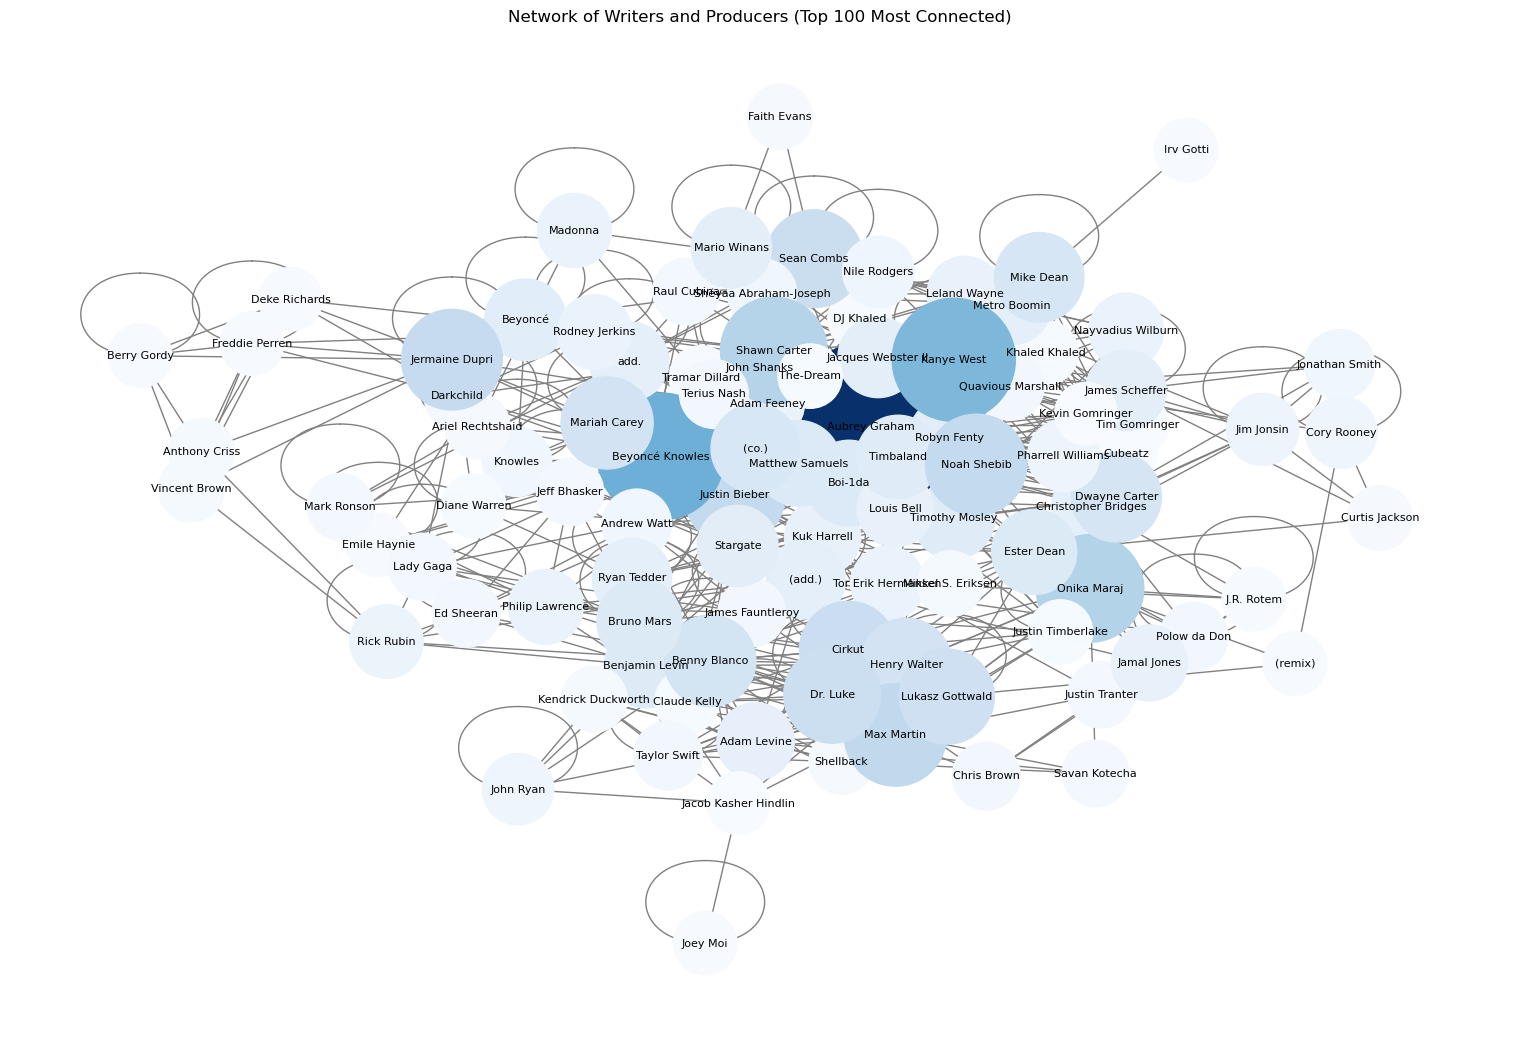

In [107]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/Users/madeline/Desktop/test_wikipedia_metadata_complete.csv"
df = pd.read_csv(file_path)

# Remove 'Unknown' entries
df = df[~df["Writers"].str.contains("Unknown", na=False)]
df = df[~df["Producers"].str.contains("Unknown", na=False)]

# Function to process names and create edges
def create_edges(df, writer_col, producer_col):
    edges = []
    for _, row in df.iterrows():
        writers = [w.strip() for w in str(row[writer_col]).split(',') if w.strip() and len(w.strip()) >= 4]
        producers = [p.strip() for p in str(row[producer_col]).split(',') if p.strip() and len(p.strip()) >= 4]
        
        # Connect writers with each other (co-writing relationships)
        for i in range(len(writers)):
            for j in range(i + 1, len(writers)):
                edges.append((writers[i], writers[j]))
        
        # Connect producers with each other (co-producing relationships)
        for i in range(len(producers)):
            for j in range(i + 1, len(producers)):
                edges.append((producers[i], producers[j]))
        
        # Connect writers to producers (collaboration relationships)
        for writer in writers:
            for producer in producers:
                edges.append((writer, producer))
    
    return edges

# Create edges based on writers and producers
edges = create_edges(df, "Writers", "Producers")

# Create the network graph
G = nx.Graph()
G.add_edges_from(edges)

# Remove isolated nodes (those with only one connection)
isolated_nodes = [node for node in G.nodes if G.degree(node) < 2]
G.remove_nodes_from(isolated_nodes)

# Draw a subgraph of the most connected nodes for clarity
top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:100]  # Top 100 most connected
subgraph = G.subgraph([node for node, _ in top_nodes])

# Compute node sizes based on degree
node_sizes = [G.degree(node) * 50 for node in subgraph.nodes]

# Compute node colors based on degree
node_colors = [G.degree(node) for node in subgraph.nodes]

# Visualizing the network with improvements
plt.figure(figsize=(15, 10))
pos = nx.kamada_kawai_layout(subgraph)  # Better layout
nx.draw(subgraph, pos, with_labels=True, node_size=node_sizes, font_size=8, edge_color="gray", node_color=node_colors, cmap=plt.cm.Blues)
plt.title("Network of Writers and Producers (Top 100 Most Connected)")
plt.show()


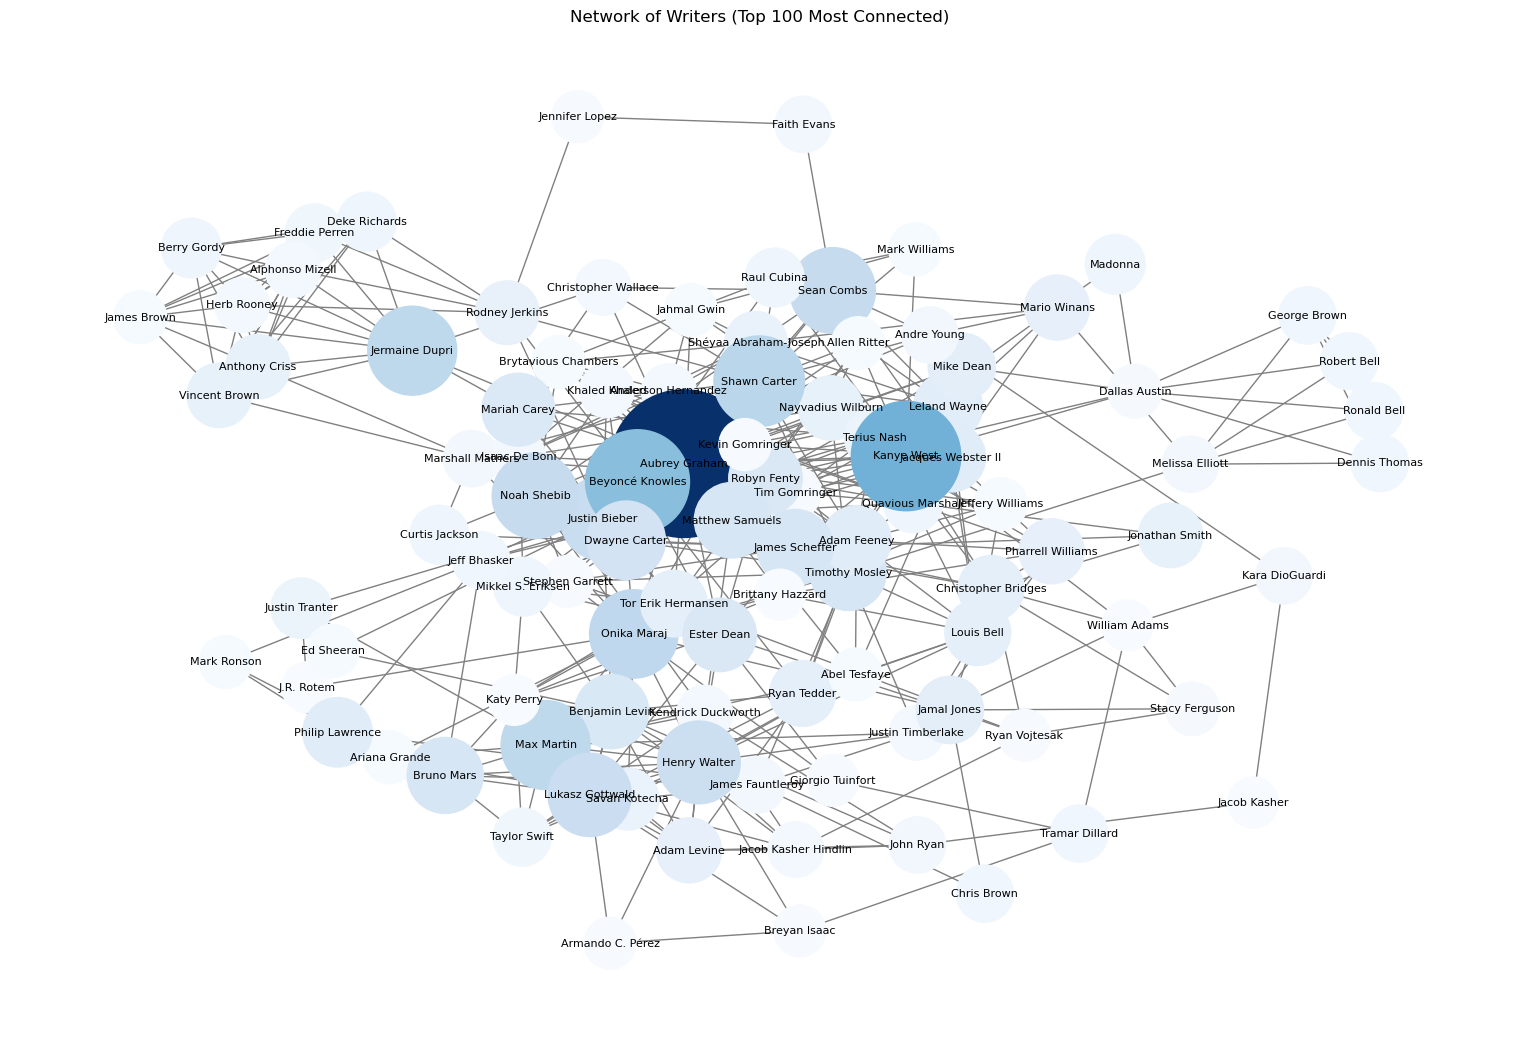

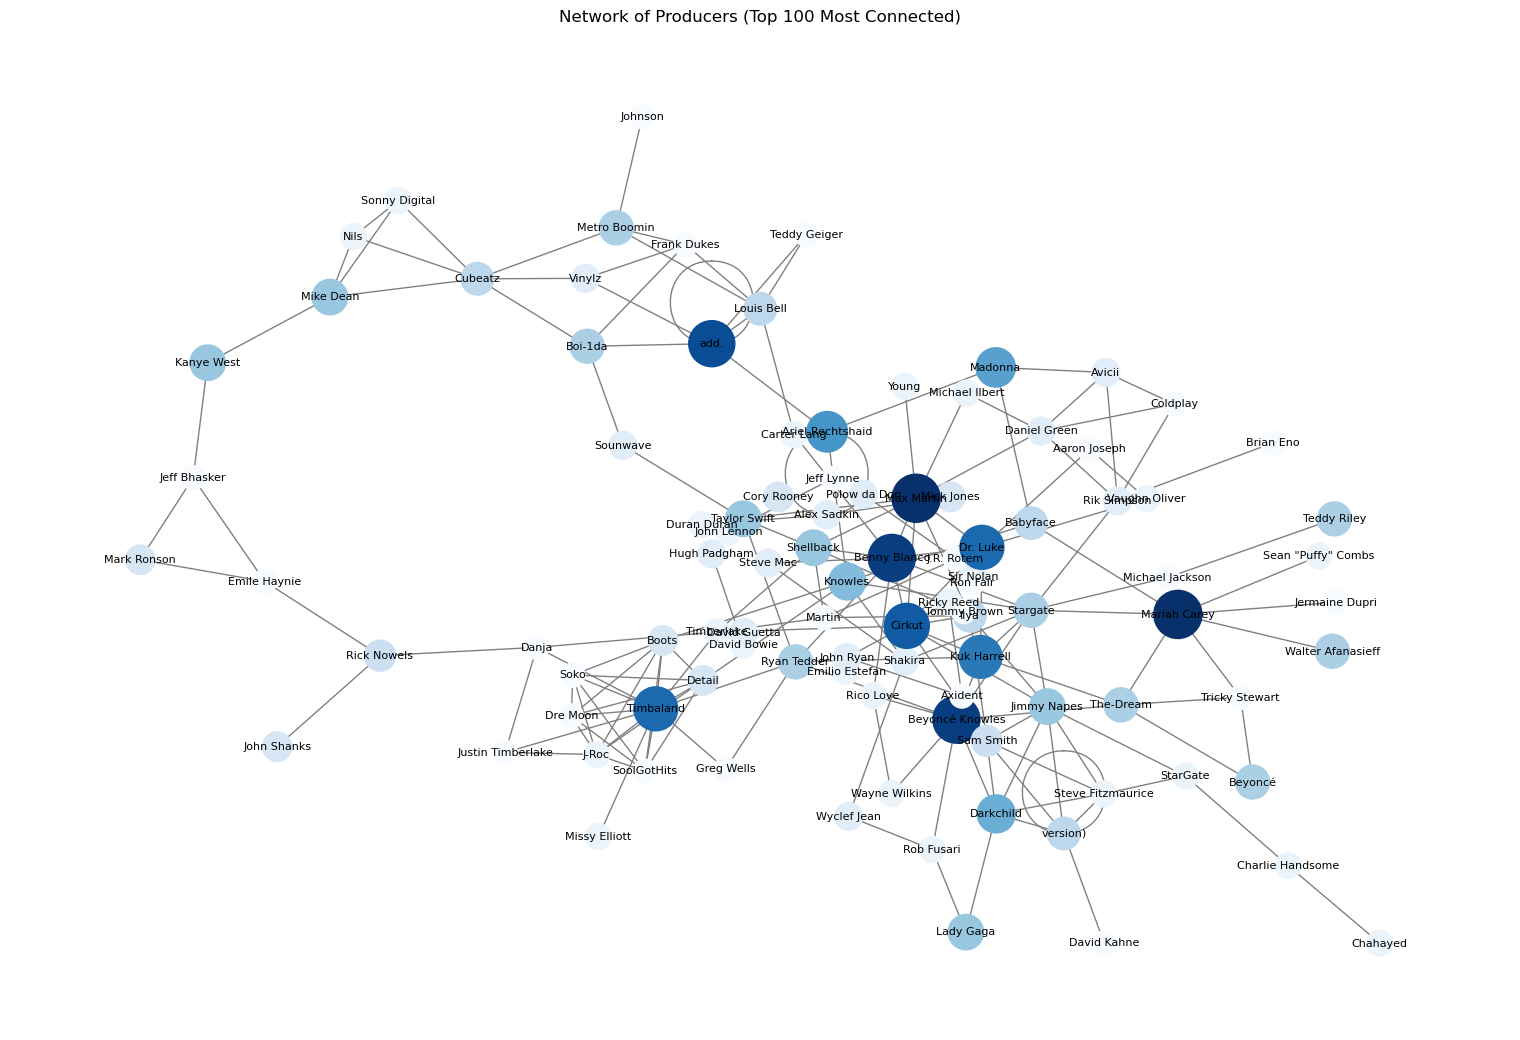

In [111]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import re

# Load the dataset
file_path = "/Users/madeline/Desktop/test_wikipedia_metadata_complete.csv"
df = pd.read_csv(file_path)

# Remove 'Unknown' entries
df = df[~df["Writers"].str.contains("Unknown", na=False)]
df = df[~df["Producers"].str.contains("Unknown", na=False)]

# Function to process names and create edges
def create_edges(df, column):
    edges = []
    for _, row in df.iterrows():
        people = [p.strip() for p in str(row[column]).split(',') 
                  if p.strip() and len(p.strip()) >= 4 and not re.search(r'\(.*\)', p)]
        
        # Connect people with each other (co-working relationships)
        for i in range(len(people)):
            for j in range(i + 1, len(people)):
                edges.append((people[i], people[j]))
    
    return edges

# Create edges separately for writers and producers
writer_edges = create_edges(df, "Writers")
producer_edges = create_edges(df, "Producers")

# Function to create and visualize a network
def visualize_network(edges, title):
    G = nx.Graph()
    G.add_edges_from(edges)
    
    # Remove isolated nodes (those with only one connection)
    isolated_nodes = [node for node in G.nodes if G.degree(node) < 2]
    G.remove_nodes_from(isolated_nodes)
    
    # Draw a subgraph of the most connected nodes for clarity
    top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:100]  # Top 100 most connected
    subgraph = G.subgraph([node for node, _ in top_nodes])
    
    # Compute node sizes based on degree
    node_sizes = [G.degree(node) * 50 for node in subgraph.nodes]
    
    # Compute node colors based on degree
    node_colors = [G.degree(node) for node in subgraph.nodes]
    
    # Visualizing the network
    plt.figure(figsize=(15, 10))
    pos = nx.kamada_kawai_layout(subgraph)  # Better layout
    nx.draw(subgraph, pos, with_labels=True, node_size=node_sizes, font_size=8, edge_color="gray", node_color=node_colors, cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Visualize writer and producer networks
visualize_network(writer_edges, "Network of Writers (Top 100 Most Connected)")
visualize_network(producer_edges, "Network of Producers (Top 100 Most Connected)")


# Does the degree distribution of writers and producers follow a power-law distribution (which is common in real-world networks like social and collaboration networks)?

In [1]:
pip install powerlaw

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/96/ab/5cc9f80f28f6a7dff646c5756e559823614a42b1939d86dd0ed550470210/scipy-1.15.3-cp311-cp311-macosx_10_13_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.2 MB/s eta 0:00:00
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/f5/bd/af9f655456f60fe1d575f54fb14704ee299b16e999704817a7645dfce6b0/matplotlib-3.10.3-cp311-cp311-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/c8/19/d04ea5f3ab2afa7799f2b1ebe1d57ff71b479f99f29b82bddc7197d50220/fonttools-4.58.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

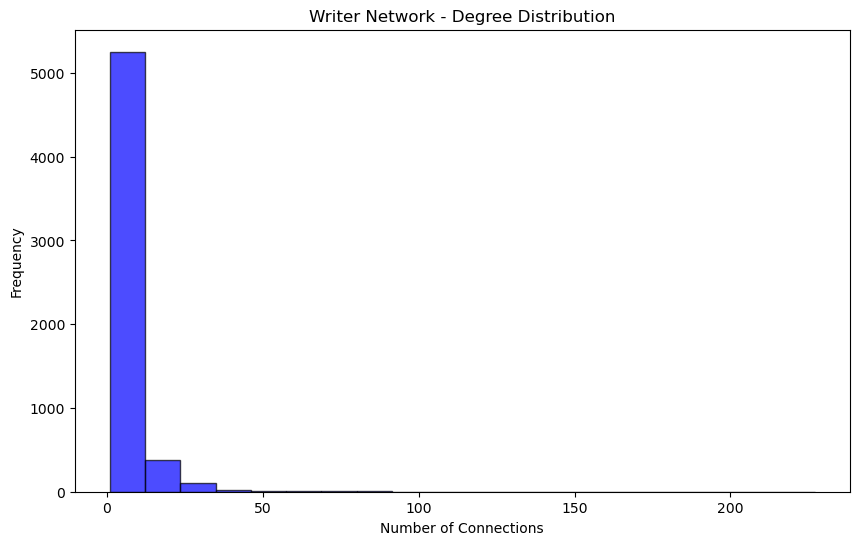

Calculating best minimal value for power law fit


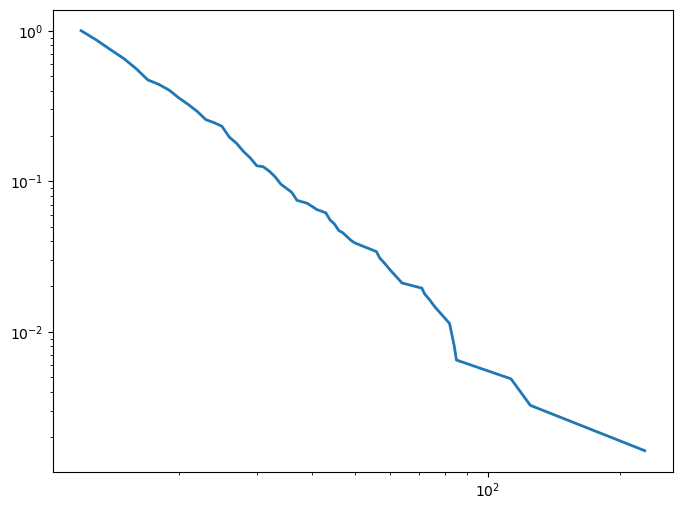

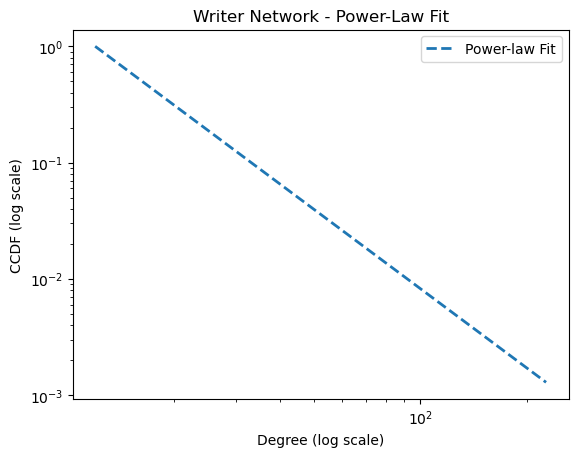

Writer Network - Power-law vs Exponential: Log-likelihood Ratio = 61.39, p-value = 0.0011
Writer Network - Power-law vs Lognormal: Log-likelihood Ratio = -0.05, p-value = 0.8523


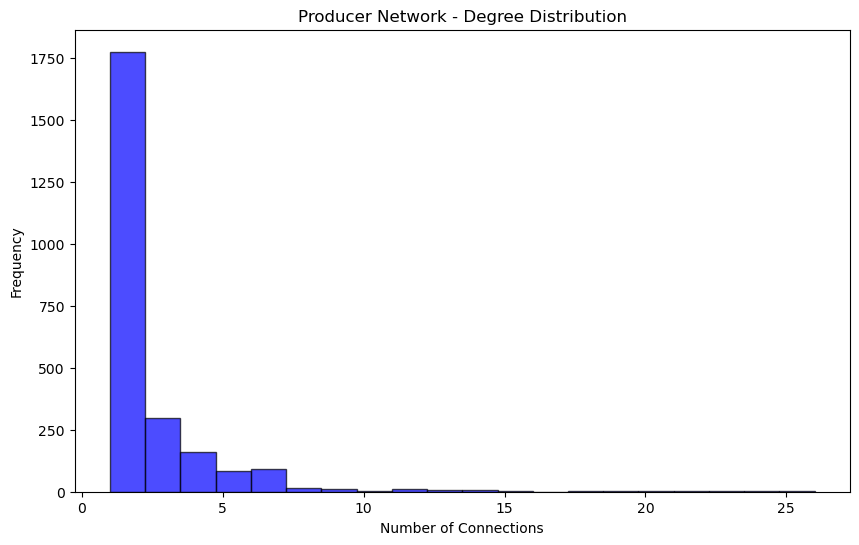

Calculating best minimal value for power law fit


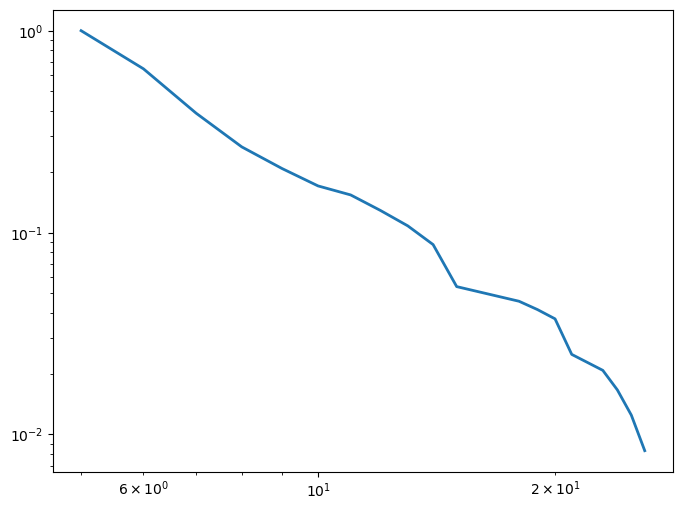

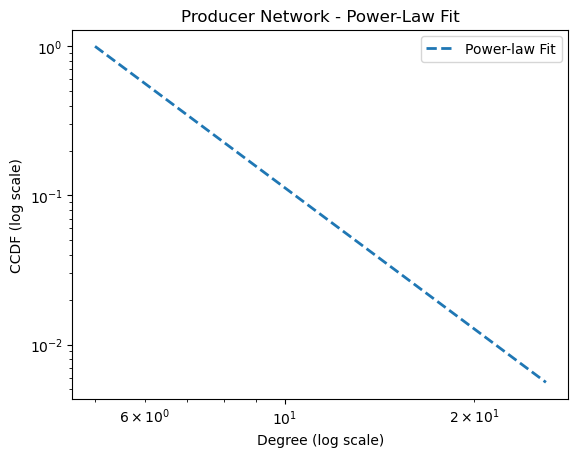

Producer Network - Power-law vs Exponential: Log-likelihood Ratio = 35.68, p-value = 0.0000
Producer Network - Power-law vs Lognormal: Log-likelihood Ratio = -3.63, p-value = 0.0061


/Users/madeline/anaconda3/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning:

invalid value encountered in divide

'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


In [156]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import re
import powerlaw
import numpy as np

# Load the dataset
file_path = "/Users/madeline/Desktop/test_wikipedia_metadata_complete.csv"
df = pd.read_csv(file_path)

# Remove 'Unknown' entries
df = df[~df["Writers"].str.contains("Unknown", na=False)]
df = df[~df["Producers"].str.contains("Unknown", na=False)]

# Function to plot degree distribution and test for power-law
def analyze_degree_distribution(edges, title):
    G = nx.Graph()
    G.add_edges_from(edges)
    degrees = np.array([G.degree(n) for n in G.nodes])
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(degrees, bins=20, color='blue', alpha=0.7, edgecolor='black')
    plt.xlabel("Number of Connections")
    plt.ylabel("Frequency")
    plt.title(f"{title} - Degree Distribution")
    plt.show()
    
    # Fit a power-law distribution
    fit = powerlaw.Fit(degrees)
    
    # Log-log plot of the degree distribution
    plt.figure(figsize=(8, 6))
    fit.plot_ccdf(linewidth=2, label='Empirical Data')
    fit.power_law.plot_ccdf(linewidth=2, linestyle='--', label='Power-law Fit')
    plt.legend()
    plt.xlabel("Degree (log scale)")
    plt.ylabel("CCDF (log scale)")
    plt.title(f"{title} - Power-Law Fit")
    plt.show()
    
    # Compare power-law fit to other distributions
    results = fit.distribution_compare('power_law', 'exponential')
    print(f"{title} - Power-law vs Exponential: Log-likelihood Ratio = {results[0]:.2f}, p-value = {results[1]:.4f}")
    
    results = fit.distribution_compare('power_law', 'lognormal')
    print(f"{title} - Power-law vs Lognormal: Log-likelihood Ratio = {results[0]:.2f}, p-value = {results[1]:.4f}")

# Analyze writer and producer degree distributions
analyze_degree_distribution(writer_edges, "Writer Network")
analyze_degree_distribution(producer_edges, "Producer Network")


1. Writer Network

Power-law vs Exponential
Log-likelihood Ratio (LLR) = 61.39, p-value = 0.0011
A high LLR (positive) suggests the power-law fits better than the exponential distribution.
Since p < 0.05, this is statistically significant, meaning we can reject the exponential model in favor of the power-law.

Power-law vs Lognormal
LLR = -0.05, p-value = 0.8523
The near-zero LLR means neither distribution is clearly better.
The high p-value (0.85) suggests that the lognormal fits just as well as the power-law, so we cannot confidently say the writer network follows a power-law.

The writer network is not exponential (which would imply a random, uniform structure).
The power-law and lognormal models fit similarly, so the network could be power-law distributed, but lognormal is just as likely.
This means the distribution of writer connections is heavy-tailed, but not necessarily a strict power law. -- though this still suggests that it functions similarly to real world networks (enough data has been connected & there are clearly a select group who are most influential.) The data suggests a clear elite group of highly connected writers, reinforcing the idea that influence and opportunity in the industry are not evenly distributed.
-- > A mix of gatekeeping and gradual growth dynamics shapes opportunities for new writers.

2. Producer Network

Power-law vs Exponential
LLR = 35.68, p-value = 0.0000
A strong positive LLR and a tiny p-value (<0.0001) show the power-law is a much better fit than the exponential.

Power-law vs Lognormal
LLR = -3.63, p-value = 0.0061
The negative LLR means the lognormal fits better than the power-law.
The small p-value (0.0061) suggests this result is statistically significant, meaning the lognormal model is more appropriate than the power-law.

The producer network is not exponential, confirming a highly uneven distribution of connections.
The lognormal model fits better than the power-law, meaning the distribution of producer connections is skewed but does not follow a strict power-law. Producers might work in clusters rather than being totally dominated by a few major players.

- Many limitations must be admitted:
- success of a song, someone may be very involved in the creation of song lyrics, but these are not listened to as much as a song created by an individual with one connection.
- (Data Completeness: The dataset may not capture all writers or their full range of connections.)
-Bias in Available Data: Some writers may be overrepresented due to better documentation.
-Network Dynamics: This analysis is based on a static snapshot of connections.
- Threshold Effects: The choice of xmin (the minimum value for fitting the power-law) can affect results.

CONCLUSION 
Both networks reject the exponential model, meaning the number of connections is not evenly distributed—some people have far more connections than others.
The writer network could be either power-law or lognormal, but we can't say for sure.
The producer network follows a lognormal distribution more than a power-law.

Not pure "winner-takes-all": In a true power-law network, a few individuals (super-connectors) dominate. Here, the distribution is skewed, but not as extreme.
